In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [39]:
# Load your dataset
data = pd.read_excel('Cleaned_Steam_Dataset.xlsx')

In [41]:
# Select relevant columns for clustering
df = data[['User Reviews Count', 'Followers', 'User Ratings']]


In [43]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [45]:
# Define DBSCAN parameters
eps = 1.5  # Optimal epsilon (maximum distance between samples)
min_samples = 5  # Minimum number of samples to form a core point

In [47]:
# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(df_scaled)

In [49]:
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels


In [51]:
# Count the number of unique clusters (excluding noise)
unique_clusters = len(set(cluster_labels) - {-1})

if unique_clusters != 2:
    print(f"Warning: Expected 2 clusters but found {unique_clusters} clusters. Adjust parameters as needed.")

In [53]:
# Group by clusters and calculate the mean for numeric columns only
cluster_stats = data.groupby('Cluster').mean(numeric_only=True).reset_index()

In [55]:
# Display cluster statistics
print("Cluster Statistics:")
print(cluster_stats)


Cluster Statistics:
   Cluster  Game's Age (Days)      Price     Followers  \
0       -1        1523.250000  47.490000  3.565998e+06   
1        0        2124.694118  40.503647  3.509177e+05   

   User Review (On a scale of 1 to 7)  User Reviews Count  \
0                            5.000000       608680.250000   
1                            5.764706       162007.827451   

   Net Revenue (in million $)  User Ratings  
0                  307.750000      7.500000  
1                  102.301961      8.670588  


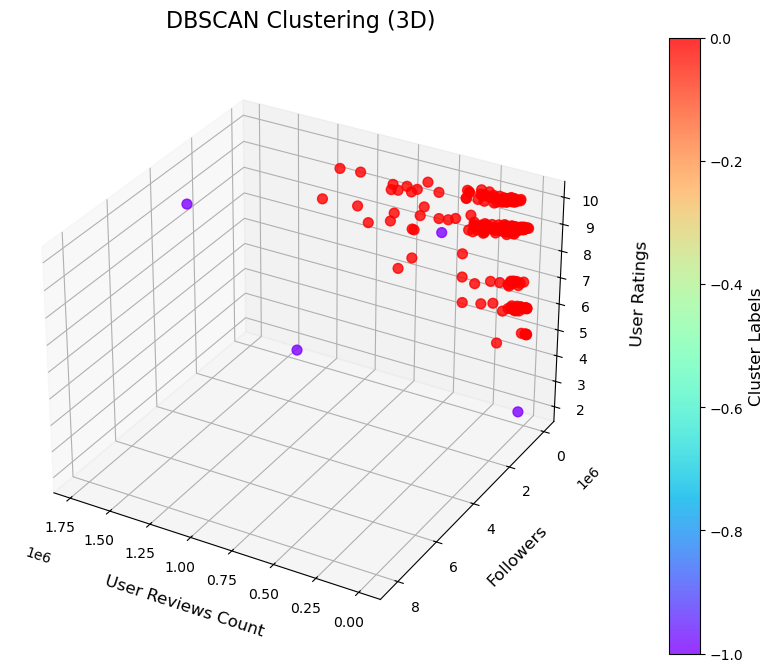

In [57]:
# 3D Visualization with enhancements
fig = plt.figure(figsize=(10, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhanced point size and transparency
scatter = ax.scatter(
    df['User Reviews Count'], 
    df['Followers'], 
    df['User Ratings'], 
    c=cluster_labels, 
    cmap='rainbow', 
    s=50,  # Adjust point size
    alpha=0.8  # Add transparency for better visual depth
)

# Adding a color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Labels', fontsize=12)

# Setting axis labels with increased font size and labelpad adjustment
ax.set_xlabel('User Reviews Count', fontsize=12, labelpad=10)
ax.set_ylabel('Followers', fontsize=12, labelpad=10)
ax.set_zlabel('User Ratings', fontsize=12, labelpad=15)  # Adjusted labelpad for visibility

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding gridlines for better visualization
ax.grid(True)

# Setting title with customization
ax.set_title('DBSCAN Clustering (3D)', fontsize=16, pad=20, loc='center')

# Adjusting view angle for better visibility of all labels
ax.view_init(elev=30, azim=120)  # Adjust elevation and azimuth for better perspective

# Show the plot
plt.show()

In [59]:
# Print Cluster Labels for each record
for index, row in data.iterrows():
    game_title = row['Title']  # Replace 'Title' with the appropriate column name for game identification
    cluster_label = row['Cluster']
    print(f'Game Title: {game_title}, Cluster Label: {cluster_label}')

Game Title: Red Dead Redemption 2, Cluster Label: 0
Game Title: Grand Theft Auto V, Cluster Label: -1
Game Title: ELDEN RING, Cluster Label: 0
Game Title: Black Myth: Wukong, Cluster Label: 0
Game Title: Cyberpunk 2077, Cluster Label: 0
Game Title: Rust, Cluster Label: 0
Game Title: Baldur's Gate 3, Cluster Label: 0
Game Title: The Witcher 3: Wild Hunt, Cluster Label: 0
Game Title: HELLDIVERS‚Ñ¢ 2, Cluster Label: 0
Game Title: Call of Duty¬Æ, Cluster Label: 0
Game Title: Tom Clancy's Rainbow Six¬Æ Siege, Cluster Label: 0
Game Title: New World: Aeternum, Cluster Label: 0
Game Title: DayZ, Cluster Label: 0
Game Title: DARK SOULS‚Ñ¢ III, Cluster Label: 0
Game Title: Sea of Thieves: 2024 Edition, Cluster Label: 0
Game Title: No Man's Sky, Cluster Label: 0
Game Title: Sid Meier‚Äôs Civilization¬Æ VI, Cluster Label: 0
Game Title: Forza Horizon 4, Cluster Label: 0
Game Title: Sekiro‚Ñ¢: Shadows Die Twice - GOTY Edition, Cluster Label: 0
Game Title: Hogwarts Legacy, Cluster Label: 0
Game Title

In [61]:
# Save the labeled dataset
data.to_csv('Labeled_Steam_Dataset2.csv', index=False)
